# 04_Spatially_variable_genes

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
from src.plot import plot_spatial, palette_celltype, palette_entity_anno, qqplot
import numpy as np
import pandas as pd
import copy
import squidpy as sq


/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/numba/core/decorators.py:246: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)
/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_text from `anndata` is deprecated. Import anndata.io.read_text instead.
  warnings.warn(msg, FutureWarning)


In [3]:
import os
import simba as si
si.__version__

/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_csv from `anndata` is deprecated. Import anndata.io.read_csv instead.
  warnings.warn(msg, FutureWarning)
/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_excel from `anndata` is deprecated. Import anndata.io.read_excel instead.
  warnings.warn(msg, FutureWarning)
/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/anndata/utils.py:429: FutureWarning: Importing read_hdf from `anndata` is deprecated. Import anndata.io.read_hdf instead.
  warnings.warn(msg, FutureWarning)
/Users/cchu/opt/anaconda3/envs/env_si

'1.2'

In [4]:
workdir = 'data/04'
si.settings.set_workdir(workdir)

Saving results in: data/04


# data

In [5]:
h5_fn = "./result_simba_rnaseq_spatialLIBD/data/151673.h5ad"
adata_CG = sc.read_h5ad(h5_fn)
adata_CG

AnnData object with n_obs × n_vars = 3611 × 16578
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'spatialLIBD', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mito', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'leiden', 'log1p', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

## Moran's I

In [6]:
moranI_fn = f"{workdir}/moranI.tsv"
print(moranI_fn)

data/04/moranI.tsv


In [9]:
sq.gr.spatial_neighbors(adata_CG, 
                        spatial_key="spatial",
                        coord_type="grid", 
                        delaunay=True)

sq.gr.spatial_autocorr(adata_CG, mode="moran", 
                       n_perms=100, n_jobs=10, 
                       genes=adata_CG.var_names)

  0%|                                                                         | 0/100 [00:00<?, ?/s]/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame implementation is deprecated and will be removed in a future version. Set the configuration option `dataframe.query-planning` to `True` or None to enable the new Dask Dataframe implementation and silence this warning.
  warnings.warn(
/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/dask/dataframe/__init__.py:31: FutureWarning: The legacy Dask DataFrame impl

In [12]:
moranI_df = adata_CG.uns['moranI'].copy()

In [17]:
moranI_df.to_csv(moranI_fn, sep='\t')

In [21]:
adata_CG.write(os.path.join(workdir, 'adata_CG.moranI.h5ad'))

In [34]:
moranI_df.head()

,I,pval_norm,var_norm,pval_z_sim,pval_sim,var_sim,pval_norm_fdr_bh,pval_z_sim_fdr_bh,pval_sim_fdr_bh
MBP,0.798507,0.0,0.000093,0.0,0.009901,0.000238,0.0,0.0,0.035215
MT-CO1,0.707854,0.0,0.000093,0.0,0.009901,0.000284,0.0,0.0,0.035215
PLP1,0.695398,0.0,0.000093,0.0,0.009901,0.000205,0.0,0.0,0.035215
SCGB2A2,0.691061,0.0,0.000093,0.0,0.009901,0.000192,0.0,0.0,0.035215
MOBP,0.641695,0.0,0.000093,0.0,0.009901,0.000191,0.0,0.0,0.035215


# plots

In [9]:
moranI_df = pd.read_csv(moranI_fn, sep='\t', index_col=0)

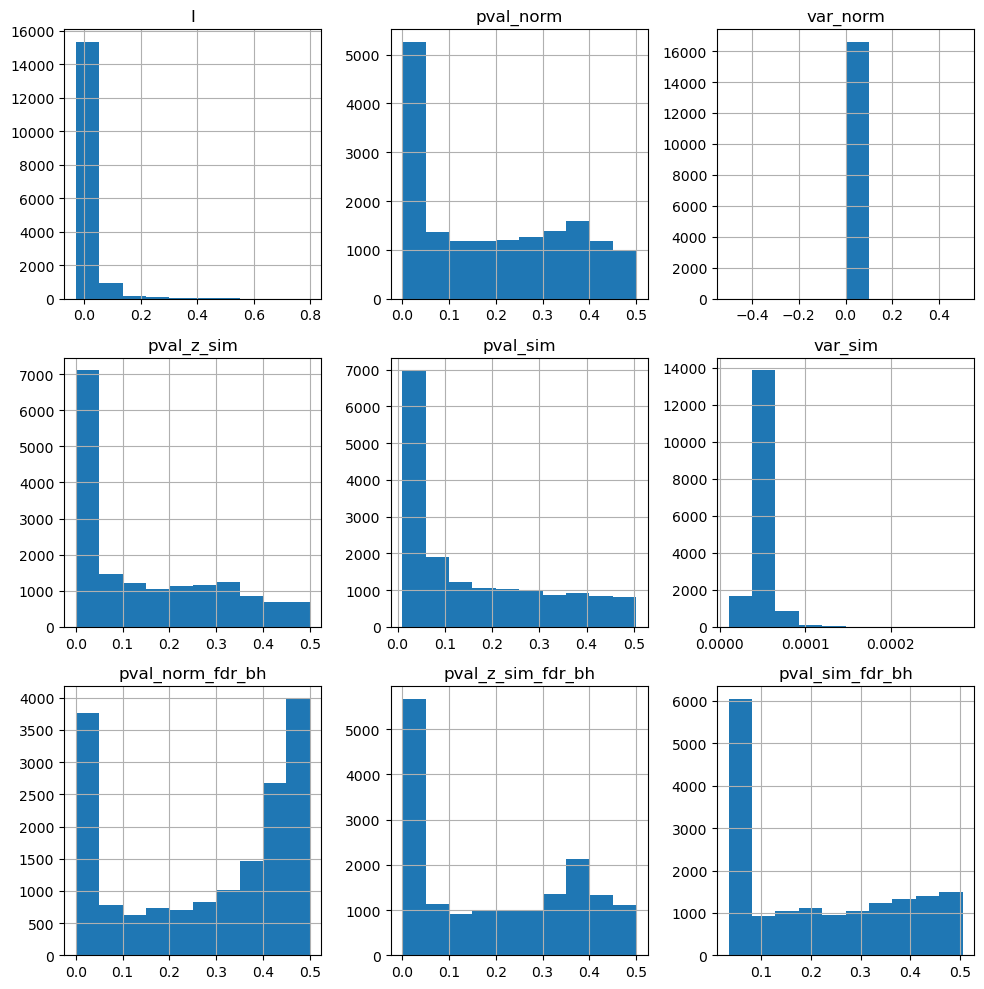

In [11]:
moranI_df.hist(figsize=(10, 10))
plt.tight_layout()
plt.show()

/Users/cchu/Desktop/phd_work/SIMBA_in_space/src/plot.py:128: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  log_pval_sorted = -np.log10(pval[pval_idx_sorted])
/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log10
  result = getattr(ufunc, method)(*inputs, **kwargs)


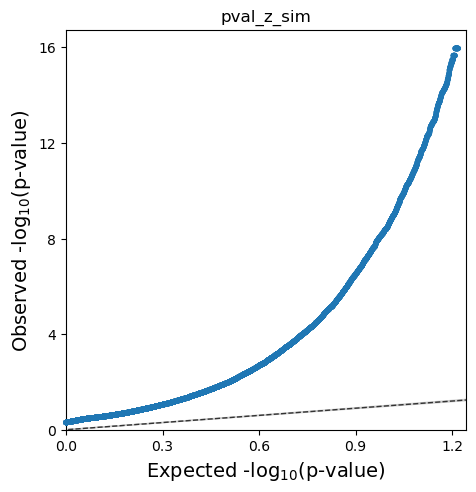

In [23]:
qqplot(moranI_df['pval_z_sim'])
plt.title('pval_z_sim')
plt.show()

In [41]:
spatial_sig_genes_df = moranI_df.query('pval_z_sim_fdr_bh < 0.05')
spatial_sig_genes_df

,I,pval_norm,var_norm,pval_z_sim,pval_sim,var_sim,pval_norm_fdr_bh,pval_z_sim_fdr_bh,pval_sim_fdr_bh
MBP,0.798507,0.000000,0.000093,0.000000e+00,0.009901,0.000238,0.000000,0.000000,0.035215
MT-CO1,0.707854,0.000000,0.000093,0.000000e+00,0.009901,0.000284,0.000000,0.000000,0.035215
PLP1,0.695398,0.000000,0.000093,0.000000e+00,0.009901,0.000205,0.000000,0.000000,0.035215
SCGB2A2,0.691061,0.000000,0.000093,0.000000e+00,0.009901,0.000192,0.000000,0.000000,0.035215
MOBP,0.641695,0.000000,0.000093,0.000000e+00,0.009901,0.000191,0.000000,0.000000,0.035215
...,...,...,...,...,...,...,...,...,...
PCGF5,-0.024208,0.006431,0.000093,1.739174e-04,0.009901,0.000040,0.031194,0.000903,0.035215
SCAPER,-0.024760,0.005465,0.000093,1.701311e-04,0.009901,0.000049,0.027152,0.000884,0.035215
ATP11B,-0.025371,0.004547,0.000093,2.424460e-04,0.009901,0.000052,0.023278,0.001218,0.035215
BRIX1,-0.029446,0.001215,0.000093,3.076164e-05,0.009901,0.000050,0.007468,0.000186,0.035215


In [42]:
spatial_sig_genes_df.index.str.contains('MT').sum()

88

In [45]:
-np.log(moranI_df['pval_z_sim_fdr_bh'])

/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


MBP              inf
MT-CO1           inf
PLP1             inf
SCGB2A2          inf
MOBP             inf
             ...    
PCGF5       7.010276
SCAPER      7.030572
ATP11B      6.710577
BRIX1       8.592403
ZCCHC10    12.068200
Name: pval_z_sim_fdr_bh, Length: 16578, dtype: float64

/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


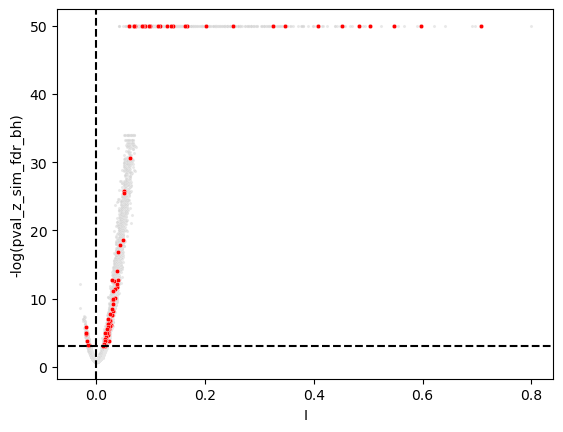

In [48]:
mt_gene_fil = spatial_sig_genes_df.index.str.contains('MT')

y = -np.log(moranI_df['pval_z_sim_fdr_bh'])
y[y == np.inf] = 50


sns.scatterplot(
    x=moranI_df['I'], y=y, 
    color='lightgray',
    s=5, alpha=0.5
)

y = -np.log(spatial_sig_genes_df.loc[mt_gene_fil, 'pval_z_sim_fdr_bh'])
y[y == np.inf] = 50
sns.scatterplot(
    x=spatial_sig_genes_df.loc[mt_gene_fil, 'I'], y=y, 
    color='red',
    s=10
)
plt.axhline(-np.log(0.05), linestyle='--', c='k')
plt.axvline(0, linestyle='--', c='k')
plt.ylabel("-log(pval_z_sim_fdr_bh)")
plt.show()

TODO: Plot original RNA data

/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/seaborn/relational.py:438: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/seaborn/relational.py:438: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/seaborn/relational.py:438: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/seaborn/relational.py:438: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  points = ax.scatter(x=x, y=y, **kws)
/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-pac

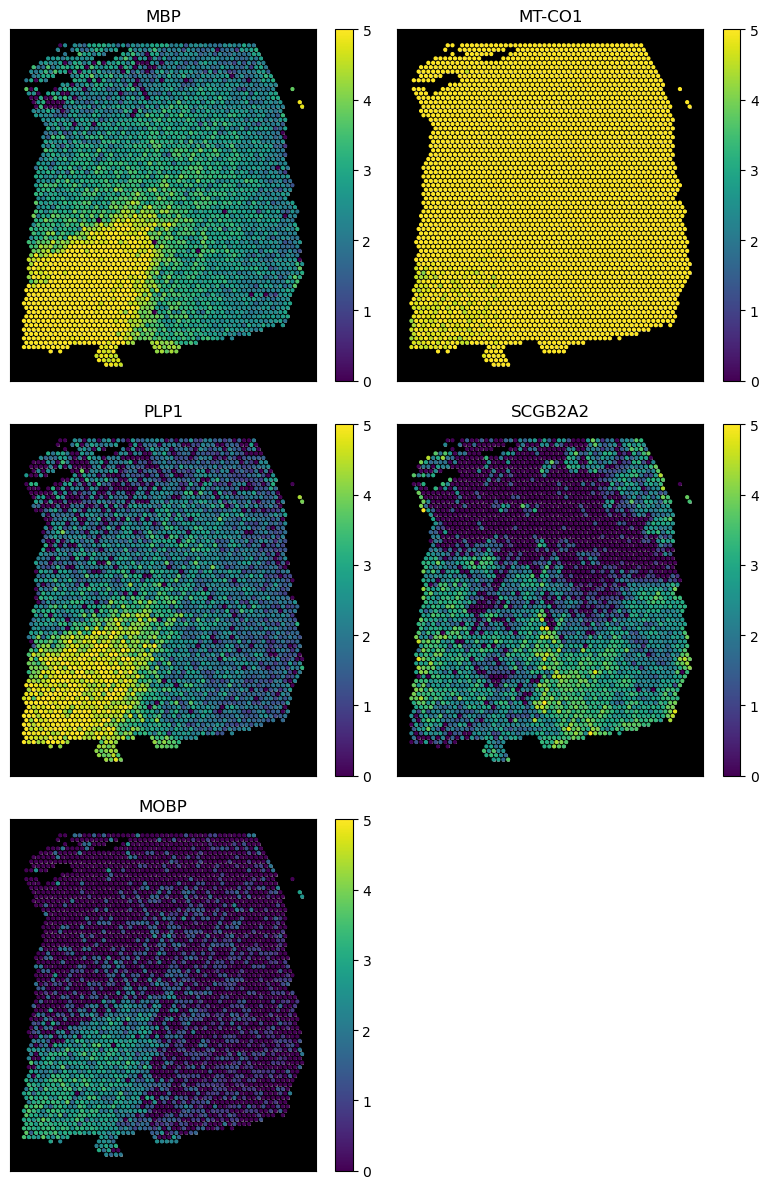

In [24]:
plot_spatial(adata_CG, color=moranI_df.head().index, fig_ncol=2, s=4, vmin=0, vmax=5)
plt.show()

## scRNAseq only embeddings

In [16]:
adata_C = sc.read_h5ad('result_simba_rnaseq_spatialLIBD/adata_C.h5ad')
adata_G = sc.read_h5ad('result_simba_rnaseq_spatialLIBD/adata_G.h5ad')
adata_all = sc.read_h5ad('result_simba_rnaseq_spatialLIBD/adata_all.h5ad')
adata_cmp = sc.read_h5ad('result_simba_rnaseq_spatialLIBD/adata_cmp.h5ad')

/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/simba/plotting/_plot.py:1065: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['color'] = dict()


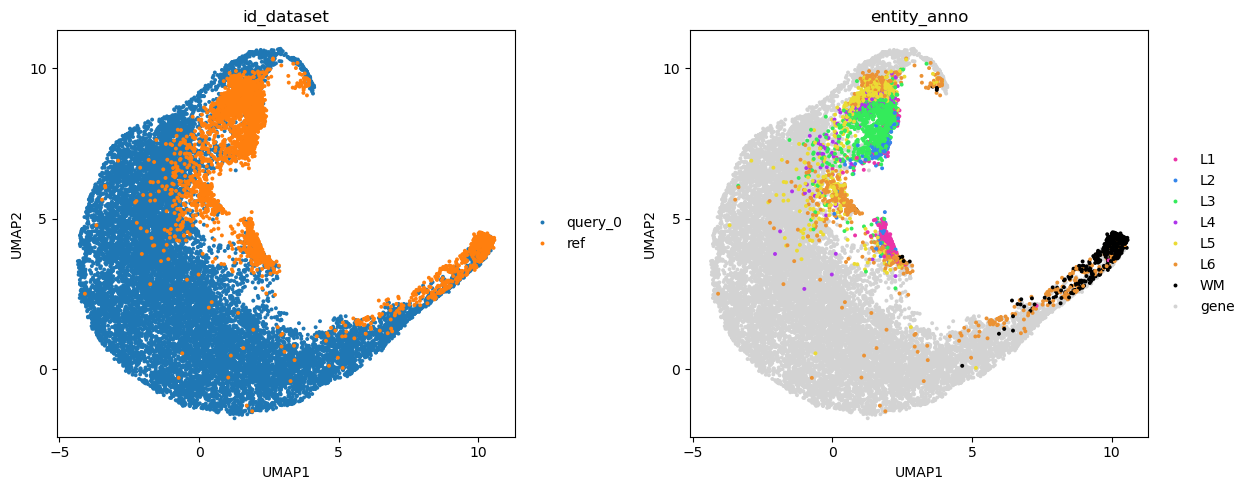

In [17]:
si.pl.umap(adata_all[::-1,],color=['id_dataset','entity_anno'],
           dict_palette={'entity_anno': palette_entity_anno},
           drawing_order='original',
           fig_size=(6,5))

## Highly variable genes

In [52]:
si.pp.select_variable_genes(adata_CG,layer='counts', n_top_genes=3000)
var_genes = adata_CG.var_names[adata_CG.var['highly_variable']].tolist()

3000 variable genes are selected.


In [56]:
# obtain SIMBA embeddings of cells and variable genes
adata_all_highvar = adata_all[list(adata_C.obs_names) + var_genes,].copy()
# visualize them using UMAP
si.tl.umap(adata_all_highvar,n_neighbors=15,n_components=2)

/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/simba/plotting/_plot.py:1065: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns['color'] = dict()


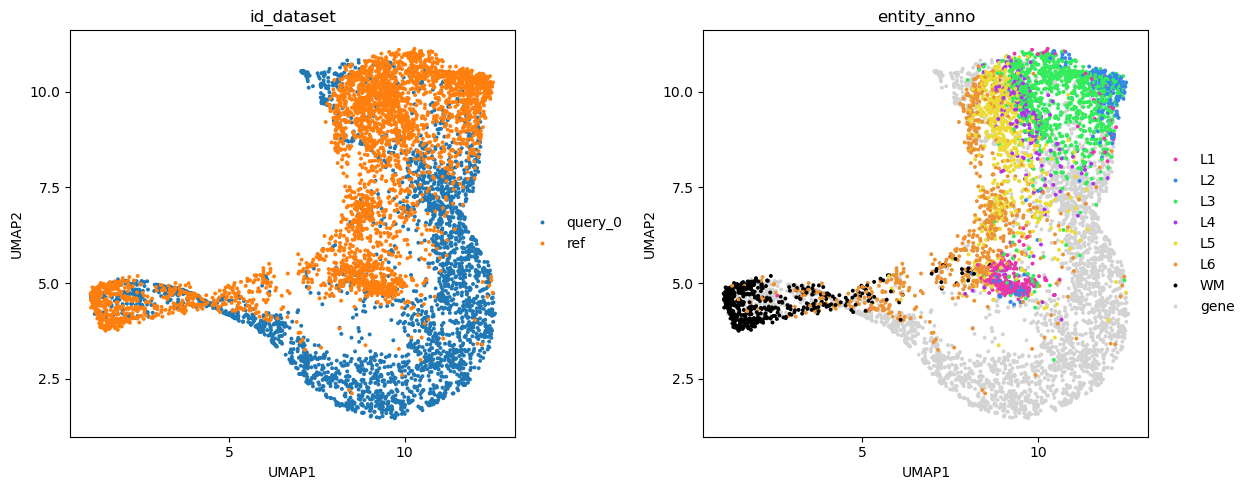

In [57]:
si.pl.umap(adata_all_highvar[::-1,], color=['id_dataset','entity_anno'],
           dict_palette={'entity_anno': palette_entity_anno},
           drawing_order='original',
           fig_size=(6,5))

## Canonical genes

In [36]:
canonical_markers = ["CCK", "ENC1", "CUX2", "RORB", "NTNG2", "FABP7", "ADCYAP1", "PVALB", "MOBP"] # Maynard 2020
more_markers = ["AQP4", "HPCAL1", "FREM3", "TRABD2A", "KRT17"]
# AQP4 (L1), HPCAL1 (L2), FREM3 (L3), TRABD2A (L5) and KRT17 (L6) 

In [54]:
# obtain SIMBA embeddings of cells and variable genes
adata_all_canon = adata_all[list(adata_C.obs_names) + canonical_markers + more_markers].copy()
# visualize them using UMAP
si.tl.umap(adata_all_canon,n_neighbors=15,n_components=2)

/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


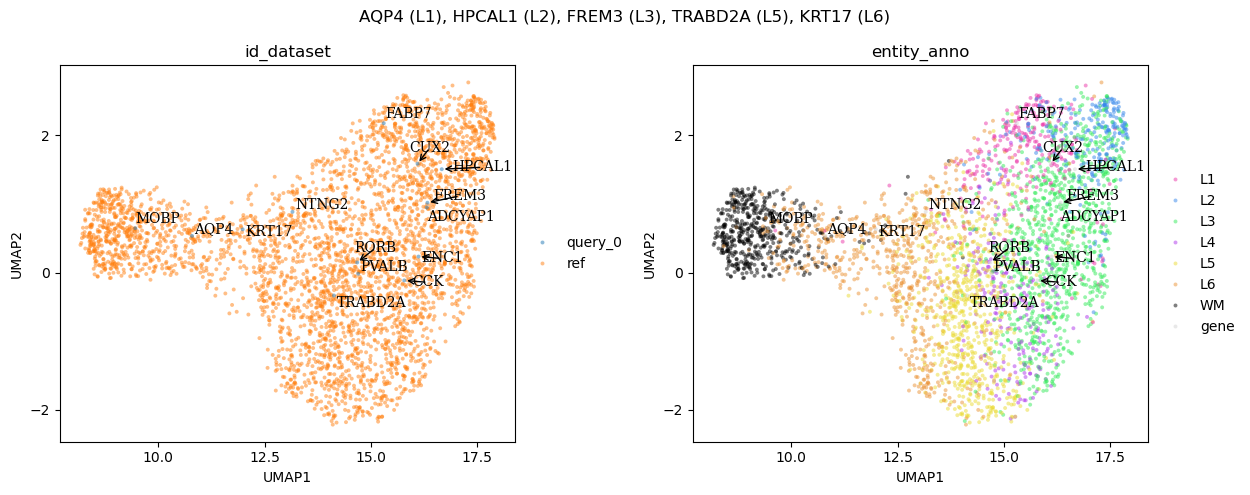

In [55]:
si.pl.umap(adata_all_canon, color=['id_dataset','entity_anno'],
           dict_palette={'entity_anno': palette_entity_anno},
           drawing_order='original',
           texts=canonical_markers + more_markers,
           show_texts=True,
           fig_size=(6,5),
           alpha=0.5
          )
plt.suptitle('AQP4 (L1), HPCAL1 (L2), FREM3 (L3), TRABD2A (L5), KRT17 (L6)')
plt.tight_layout()
plt.show()

Closer to the cell-only UMAP

## Spatially variable genes

### Subset

In [92]:
# obtain SIMBA embeddings of cells and variable genes
adata_all_spatialvar = adata_all[list(adata_C.obs_names) + spatial_sig_genes_df.iloc[:10].index.tolist()].copy()
# visualize them using UMAP
si.tl.umap(adata_all_spatialvar,n_neighbors=15,n_components=2)

/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


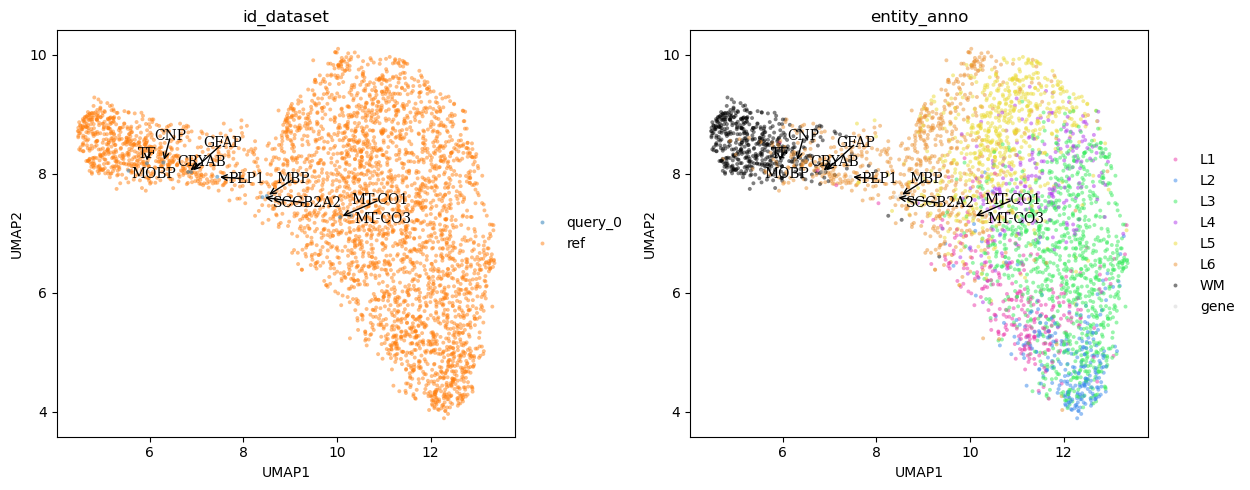

In [95]:
si.pl.umap(adata_all_spatialvar, color=['id_dataset','entity_anno'],
           dict_palette={'entity_anno': palette_entity_anno},
           drawing_order='original',
           texts=spatial_sig_genes_df.iloc[:10].index.tolist(),
           show_texts=True,
           fig_size=(6,5),
           alpha=0.5
          )
plt.tight_layout()
plt.show()

### All adj_z_pval<0.05

TODO: Moran I coefficient cut off

In [49]:
spatial_sig_genes_df.shape

(5667, 9)

In [19]:
# obtain SIMBA embeddings of cells and variable genes
adata_all_spatialvarfull = adata_all[list(adata_C.obs_names) + spatial_sig_genes_df.index.tolist()].copy()
# visualize them using UMAP
si.tl.umap(adata_all_spatialvarfull,n_neighbors=15,n_components=2)

/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/Users/cchu/opt/anaconda3/envs/env_simba/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


Looks like you are using a tranform that doesn't support FancyArrowPatch, using ax.annotate instead. The arrows might strike through texts. Increasing shrinkA in arrowprops might help.


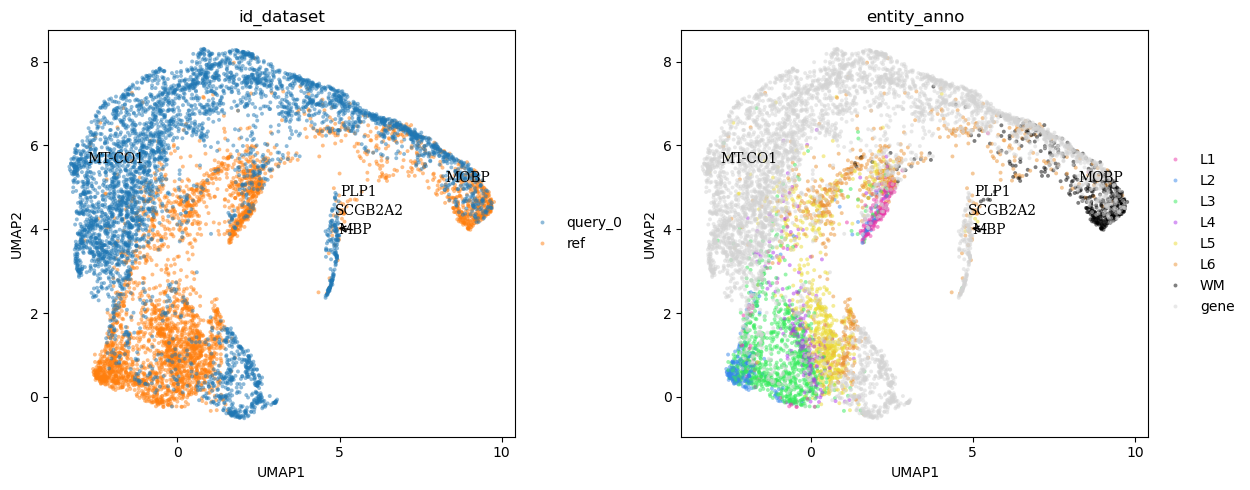

In [20]:
si.pl.umap(adata_all_spatialvarfull, color=['id_dataset','entity_anno'],
           dict_palette={'entity_anno': palette_entity_anno},
           drawing_order='original',
           texts=spatial_sig_genes_df.head().index,
           show_texts=True,
           fig_size=(6,5),
           alpha=0.5
          )
plt.tight_layout()
plt.show()

## Simple Layer specific DE

In [22]:
adata_CG

AnnData object with n_obs × n_vars = 3611 × 16578
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'spatialLIBD', 'leiden'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mito', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts'
    uns: 'leiden', 'log1p', 'neighbors', 'pca', 'spatial', 'umap'
    obsm: 'X_pca', 'X_umap', 'spatial'
    varm: 'PCs'
    layers: 'counts'
    obsp: 'connectivities', 'distances'